In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_excel('datos-estadistica-platzi.xlsx')
# display(df.head())
display(df)

,ID,País,Estado Socioeconómico,Apps Descargadas,Tiempo en Celular (horas)
0,1,México,Medio,75,4.5
1,2,Colombia,Bajo,30,2.8
2,3,Argentina,Alto,120,7.1
3,4,México,Medio,60,5.0
4,5,Chile,Medio,85,6.3
5,6,Perú,Bajo,45,3.2
6,7,México,Medio,90,5.8
7,8,Colombia,Medio,70,4.1
8,9,Argentina,Medio,100,6.5
9,10,México,Bajo,50,3.9


In [3]:
df.isna().any().any()
if df.isna().any().any() is True:
    print("Hay valores nulos en el DataFrame")
else:
    print("No hay valores nulos en el DataFrame")


No hay valores nulos en el DataFrame


### _Tabla de frecuencias de pais_

In [4]:
frecuencias = (
    df['País'].value_counts()           # de mi dataframe original, selecciona todas las variables categoricas de pais y los cuenta
    .to_frame('Frecuencia Absoluta')    # convierte la serie en seleccionada del dataframe original y la convierte en un dataframe con el nombre de Frecuencia Absoluta
)
frecuencias = frecuencias.reset_index()
display(frecuencias)

,País,Frecuencia Absoluta
0,México,18
1,Colombia,10
2,Argentina,8
3,Chile,7
4,Perú,7


In [5]:
frecuencias['Frecuencia Relativa'] = (
    frecuencias['Frecuencia Absoluta'] / frecuencias['Frecuencia Absoluta'].sum()*100
)

frecuencias = frecuencias.reset_index()
display(frecuencias)

,index,País,Frecuencia Absoluta,Frecuencia Relativa
0,0,México,18,36.0
1,1,Colombia,10,20.0
2,2,Argentina,8,16.0
3,3,Chile,7,14.0
4,4,Perú,7,14.0


In [6]:
display(df.columns)

Index(['ID', 'País', 'Estado Socioeconómico', 'Apps Descargadas',
       'Tiempo en Celular (horas)'],
      dtype='object')

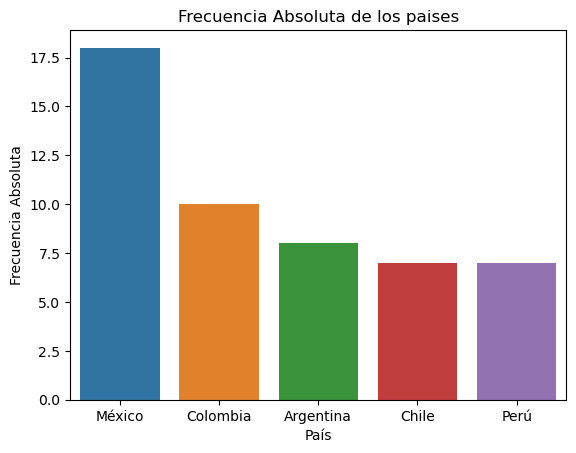

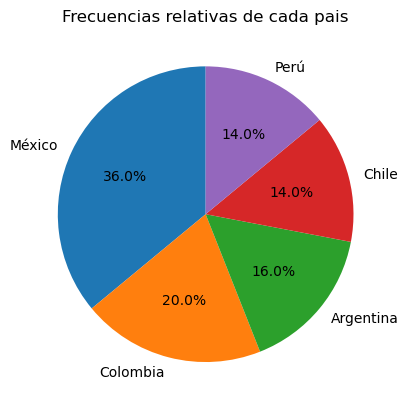

In [7]:
sns.barplot(
    data=frecuencias,
    x='País',
    y='Frecuencia Absoluta'
)
plt.title('Frecuencia Absoluta de los paises')
plt.show()

plt.pie(
    frecuencias['Frecuencia Absoluta'],
    labels      =frecuencias["País"],
    autopct     ='%1.1f%%',
    startangle  =90
)
plt.title('Frecuencias relativas de cada pais')
plt.show()

### _Tabla de frecuencias de "Estado Socioeconómico"_

In [8]:
frec_edo_soc = (
    df['Estado Socioeconómico'].value_counts()
    .to_frame('Frecuencia Absoluta')
)
frec_edo_soc = frec_edo_soc.reset_index()
display(frec_edo_soc)

,Estado Socioeconómico,Frecuencia Absoluta
0,Medio,30
1,Bajo,13
2,Alto,7


In [9]:
frec_edo_soc['Frecuencia Relativa'] = (
    (frec_edo_soc['Frecuencia Absoluta'] / frec_edo_soc['Frecuencia Absoluta'].sum()) * 100
)


In [10]:
frec_edo_soc['Frecuencia Acumulada'] = (
    frec_edo_soc['Frecuencia Absoluta'].cumsum()
)

frec_edo_soc = frec_edo_soc.reset_index()

display(frec_edo_soc)   # o deja frec_edo_soc como última línea de la celda

,index,Estado Socioeconómico,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
0,0,Medio,30,60.0,30
1,1,Bajo,13,26.0,43
2,2,Alto,7,14.0,50


/home/paco/miniforge3/envs/estadistica-descriptiva/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


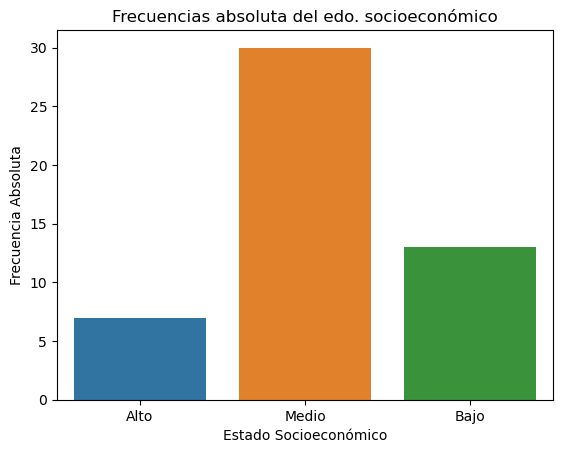

In [11]:
# Orden de variables categoricas
orden = ['Alto', 'Medio', 'Bajo']
frec_edo_soc['Estado Socioeconómico'] = (
    pd.Categorical(frec_edo_soc['Estado Socioeconómico'],
                    categories=orden,
                    ordered=True)
);
sns.barplot(data=frec_edo_soc, y='Frecuencia Absoluta', x='Estado Socioeconómico');
# plt.pie(data=frec_edo_soc, x='Frecuencia Absoluta')
plt.title('Frecuencias absoluta del edo. socioeconómico')
plt.show()

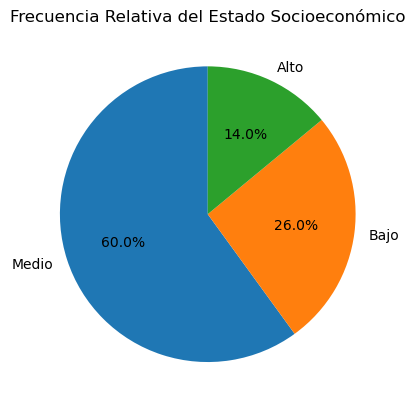

In [12]:
plt.pie(
    frec_edo_soc['Frecuencia Relativa'], 
    labels      = frec_edo_soc['Estado Socioeconómico'],
    autopct     = '%1.1f%%',
    startangle  = 90
)

plt.title('Frecuencia Relativa del Estado Socioeconómico')
plt.show()

In [52]:
# Tabla para graficar el Histograma de Tiempo en Celular (horas)
# 1) número de clases con Sturges
numero_total_de_datos = len(df['ID'])
k = int(round(1 + np.log2(numero_total_de_datos)))

# 2) cortar en k clases tipo [a,b)

cats = pd.cut(
        df['Tiempo en Celular (horas)'], 
        bins=k, 
        right=False, 
        include_lowest=True)

    
# # 3) frecuencias absolutas y relativas
freq_abs = cats.value_counts(sort=False)
freq_rel = cats.value_counts(sort=False, normalize=True)
freq_abs_acum = freq_abs.cumsum()
freq_rel_acum = freq_rel.cumsum()

In [ ]:
# Tabla para graficar el Histograma de Apps Descargadas
k = round(1 + np.log2(len(df["ID"])))

cats = pd.cut(
        df['Apps Descargadas'],
        bins=k,
        right=False,
        include_lowest=True
)
# display(cats)
freq_abs = cats.value_counts(sort=False)
frec_rel = cats.value_counts(sort=False, normalize=True)
freq_abs_acum = freq_abs.cumsum()
freq_rel_acum = freq_rel.cumsum()
display(freq_rel_acum)

Tiempo en Celular (horas)
[2.5, 3.371)      0.18
[3.371, 4.243)    0.30
[4.243, 5.114)    0.50
[5.114, 5.986)    0.64
[5.986, 6.857)    0.86
[6.857, 7.729)    0.92
[7.729, 8.606)    1.00
Name: proportion, dtype: float64